# Capstone Project 1 - Part 4  Machine Learning


# IN PROGRESS ---- 

### Prediction of electricity rates (cost/Kwh) and consumption 
### Author: Elizabeth Izarra

### General Problem:

Electricity has a very dynamic market price since it is a commodity that is essential for daily life and non-storable where generation and demand must be continuously balanced. This is turn make it dependable of the weather conditions. 

### Data Sources:

- U.S. Energy Information Administration (EIA)
- National Oceanic and Atmospheric Administration NOAA

See Capstone Project 1 - Part 1 Data Acquisition and Data Wrangling 

#### File used as source for this Capstone Project 1- Part 4:  
AllData_2.csv  - generated in Capstone Project 1 - Part 1 Data Acquisition and Data Wrangling

### Data Preparation



 From Project1_Part2 can be visualized that the Data is Time Series and non-stationary due to:
 
 1.Trend - the Retail price of Electricy grows over time. The trend component of our predicted variable might be due to inflation or some other macro-economic factors that are not reflected in the collected features into the data. 
 
 2.- Seasonality - there is a periodic change of the price which might be considered in some models as sesonality. Nevertheless, It was studied that the Retail price of Electricy tend to be higher in months with higher temperature. Thus, depending on the model these changes can be considered as a consequece of the correlation with temperature and/or other features.
 
 

 

### Models under consideration

According to the observed in the Project1_Part3 - Statistic Inference, it would be necessary a model per region.  Nevertheless, for the initial model selection,the predicted variable would be the US average temperature in order to simplify complexity and reduce computation time.

Two kind of models were considered: Time-series univariable models and multivariable models.

**Time-series univariable models:**
1. Moving Average
2. Facebook profet
3. ARIMA

This kids of time series uni-variable models base their predictions only on the date-time information.  The above considered models are traditionally used for time-series predictions.

**Multivariable models:**

1. Moving Average + Linear Regression (Combined model)
2. Moving Average + Lasso (Combined model)
3. Moving Average + Ridge (Combined model)
4. Moving Average + ElasticNet (Combined model)
5. Long Short-Term Memory (LSTM) (Unsupervised model)

Combined models - Time-series univariable model + atemporal multivariable model: it considers a Time-series univariable model to forecast the trend + an atemporal multivariable model to forecast the differentiated data. The intention is to remove the trend part (inflation and other macro-ecomic factors) by using moving average and predict the remaining part (which depends on temperature, net generation, consumption, etc) by using different regressors. Thus, the predicted value would be the addition of both predictions. 

### Metrics for model Selection

The metrics for model selection are:

- rmse (Root-mean-sqaured-error) for a test size of 0.2
- cv_mean_rmse: mean of rmse of the cross validation of the tunned models by using timeseriessplit with a number of timesplits of 7



### Results

#### Moving Average 
(Time-series univariable model)

<img src="img_part4/moving_average_model.png">

<img src="img_part4/moving_average_cv.png">

#### Facebook Prophet (fbprophet) also known as Prophet
Time-series univariable model

Prophet is a univariate model. It could be considered a naive model since it intends to predict the outcome based just on the dates (time series).  The model descompount the outcome/response variable 𝑌  behavior into trend and seasonality parts. 

Y =Xi(1) Trend + Xi(2) Seasonality


The trend estimator uses linear regression with changing points as hyperparameter. It was used 'autoscale' which is the default hyperparameter was used.

Seasonalities are estimated using a partial Fourier sum, which is a well known mathematic method traditionally used to model periodic electrical signals. The parameter fourier_order=5 was used. This values was selected by inspection of the graphs of the components since in Project 1_part2 was visualized the dependency of variation of price with respect month of the year due to temperatures. Also, an additive annual seasonality of 365 days was added based on the data analysis done in previous parts.

Reference: https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

<img src="img_part4/fbprophet_model_part1.png">

<img src="img_part4/fbprophet_model_part2.png">

<img src="img_part4/fbprophet_cv.png">

According to the cross-validation of fbprophet model graph above, the error increases when the test size or prediction window (Horizon) is bigger

#### ARIMA (autoregressive integrated moving average)
Time-series univariable model

Refrence: http://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.fit.html
GridSearch from scikit-learn could not be used with  ARIMA estimator as it does not implement a 'get_params' methods. Thus, a custom Gridsearch with cross validation was performed. It was found that the best ARIMA model hyperparameters are: order (12,1,0), typ=Levels, Trend=constant, Dinamic=False.



<img src="img_part4/arima_model_(12, 1, 0)_levels_False_c.png">

A cross-validation of the best model was done by splitting the data with TimeSeriesSplit as shown below. The results (rmse) seems to be consistent with exception of the cv_0 which might be due to the short size of then train set.

<img src="img_part4/arima_model_cv_(12, 1, 0)_levels_False_c.png">


#### Moving Average + Other regressors


In this part, the moving average is calculated to estimate the trend and substract it from the outcome/response variable 𝑌 in order to eliminate the growing trend. The differentiated outcome/response variable diff_𝑌 without trend is then considered an atemporal data set. The atemporability is giving by the fact that the "seasonality" changes can be predicted by using the features that affect such changes others than date/time.

Also, due to the scale difference between different features, pipeline consistent of a Scaler and a model from Skilearn had to be applied.

Once, the best fit-parameters were found for the model of the differentiated data,  It was found that passing just the best parameters to the 'diferentiated' model to train it with smaller training data, the forecast is not as good as when the model is re-train. Therefore, the model is saved to be re-train for later predictions.

A 'manual" cross-validation w


* Moving Average + Linear Regresor **

<img src="img_part4/mov_avg_plus_Linear Regression.png">
<img src="img_part4/mov_avg_plus_Linear Regressioncoef.png">
<img src="img_part4/mov_avg_plus_Linear Regression_cv.png">

* Moving Average + Lasso Regresor **

<img src="img_part4/mov_avg_plus_Lasso.png">
<img src="img_part4/mov_avg_plus_Lassocoef.png">
<img src="img_part4/mov_avg_plus_Lasso_cv.png">

* Moving Average + Ridge Regresor **

<img src="img_part4/mov_avg_plus_Ridge.png">
<img src="img_part4/mov_avg_plus_Ridgecoef.png">
<img src="img_part4/mov_avg_plus_Ridge_cv.png">

* Moving Average + ElasticNet Regresor **

<img src="img_part4/mov_avg_plus_ElasticNet.png">
<img src="img_part4/mov_avg_plus_ElasticNetcoef.png">
<img src="img_part4/mov_avg_plus_ElasticNet_cv.png">

#### Long Short-Term Memory (LSTM) 
LSTM is a recurrent neural networks able to almost seamlessly model problems with multiple input variables.

### Model Selection Metrics
<img src="img_part4/Models_performance.png">
                             Model   rmsloge      rmse  cv_rmse_mean
0  Moving Average + Linear Regresor Model  0.016151  0.193373           NaN




### -------------------------------------------------------------------------------------------------------------------------------------------------------

#### Importing relevant modules and defiing functions

In [235]:
# import the relevant modules
import pandas as pd
%matplotlib inline
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import TimeSeriesSplit 
import warnings


warnings.filterwarnings('default') #print the first occurrence of matching warnings for each location where the warning is issued
#warnings.filterwarnings('ignore') 

In [236]:
#Annual and monthly mean in US
def resample_mean_US(df, f='Y'):
   
    df['date']=pd.to_datetime(df['date'], format="%Y-%m-%d")
   
    if f=='m': 
        df['month']=df['date'].dt.month
    df=df.set_index(['date'])
    df = df.sort_values(by=['date'],ascending=[True])
    df=df.resample(f).mean()
    df.reset_index()
    return df

### Getting Data retrieved in Project_Part1: Data acquisition and data wrangling

In [237]:
#Getting Data retrieved in Project_Part1
file='AllData_2.csv'
df_data_orig=pd.read_csv(file)
df_data_all=df_data_orig.copy()
#delete any unnamed column product of saving DataFrames in range index to csv
df_data_all.drop(df_data_all.columns[df_data_all.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df_data_all.head()

#getting US regions
file='regions.csv'
df_reg_orig=pd.read_csv(file)
df_reg=df_reg_orig.copy()

#Add column Region to the DataFrame
for reg in df_reg.columns:
    #getting the data for the states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)

    idx_region=df_data_all.index[df_data_all['state'].isin(list_states)]
    df_data_all.loc[idx_region,'region']=reg

df_data_all['date']=pd.to_datetime(df_data_all['date'], format="%Y-%m-%d")

In [238]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 17 columns):
date                                        11016 non-null datetime64[ns]
iso3166                                     11016 non-null object
Net generation                              11016 non-null float64
unit_x                                      11016 non-null object
Retail sales of electricity                 11016 non-null float64
unit_y                                      11016 non-null object
Revenue from retail sales of electricity    11015 non-null float64
unit_x.1                                    11016 non-null object
Average retail price of electricity         11016 non-null float64
unit_y.1                                    11016 non-null object
Number of customer accounts                 7078 non-null float64
unit                                        6732 non-null object
TAVG                                        11016 non-null float64
TMAX                 

In [239]:
df_data_all.head()

,date,iso3166,Net generation,unit_x,Retail sales of electricity,unit_y,Revenue from retail sales of electricity,unit_x.1,Average retail price of electricity,unit_y.1,Number of customer accounts,unit,TAVG,TMAX,TMIN,state,region
0,2018-12-01,USA-AK,508.48364,thousand megawatthours,541.79201,million kilowatthours,107.60184,million dollars,19.86,cents per kilowatthour,344957.0,number of customers,13.919636,19.644565,8.191273,Alaska,Pacific Noncontiguous
1,2018-11-01,USA-AK,459.47404,thousand megawatthours,507.34973,million kilowatthours,97.41503,million dollars,19.20,cents per kilowatthour,345444.0,number of customers,22.048986,27.529054,16.563514,Alaska,Pacific Noncontiguous
2,2018-10-01,USA-AK,437.14615,thousand megawatthours,472.18412,million kilowatthours,94.89770,million dollars,20.10,cents per kilowatthour,346050.0,number of customers,36.289632,43.016667,29.612667,Alaska,Pacific Noncontiguous
3,2018-09-01,USA-AK,566.15276,thousand megawatthours,466.33372,million kilowatthours,90.49571,million dollars,19.41,cents per kilowatthour,345366.0,number of customers,46.673422,55.364026,37.996678,Alaska,Pacific Noncontiguous
4,2018-08-01,USA-AK,636.60150,thousand megawatthours,471.08394,million kilowatthours,93.52328,million dollars,19.85,cents per kilowatthour,345757.0,number of customers,51.921967,58.719016,45.120328,Alaska,Pacific Noncontiguous


In [240]:
#Fill missing values
df=df_data_all.copy()
df=df.fillna(method='ffill')
#calculate electricity overhead
#df['electricity overhead']=df['Net generation']-df['Retail sales of electricity']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 17 columns):
date                                        11016 non-null datetime64[ns]
iso3166                                     11016 non-null object
Net generation                              11016 non-null float64
unit_x                                      11016 non-null object
Retail sales of electricity                 11016 non-null float64
unit_y                                      11016 non-null object
Revenue from retail sales of electricity    11016 non-null float64
unit_x.1                                    11016 non-null object
Average retail price of electricity         11016 non-null float64
unit_y.1                                    11016 non-null object
Number of customer accounts                 11016 non-null float64
unit                                        11016 non-null object
TAVG                                        11016 non-null float64
TMAX               

# ===============================================

### Working for a model for the US mean temperature

In [241]:
#Aggregating data per month for USA
#df=df_data_all.copy()
df_monthly_US=resample_mean_US(df,f='m')
df_monthly_US=df_monthly_US.reset_index()

In [242]:
df_monthly_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
date                                        216 non-null datetime64[ns]
Net generation                              216 non-null float64
Retail sales of electricity                 216 non-null float64
Revenue from retail sales of electricity    216 non-null float64
Average retail price of electricity         216 non-null float64
Number of customer accounts                 216 non-null float64
TAVG                                        216 non-null float64
TMAX                                        216 non-null float64
TMIN                                        216 non-null float64
month                                       216 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 17.0 KB


In [243]:
df_monthly_US.describe()

,Net generation,Retail sales of electricity,Revenue from retail sales of electricity,Average retail price of electricity,Number of customer accounts,TAVG,TMAX,TMIN,month
count,216.000000,216.000000,216.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000
mean,6589.898059,5997.003405,558.645746,9.526554,2.804842e+06,52.837570,63.774940,41.906420,6.500000
std,669.394202,592.487130,111.580335,1.451169,1.206595e+05,15.123008,15.789859,14.488597,3.460071
min,5452.526843,4961.444385,348.114946,6.888431,2.575671e+06,28.062792,37.697715,17.293057,1.000000
25%,6061.598193,5563.347489,490.950957,8.277059,2.713082e+06,39.165053,49.329119,28.844927,3.750000
50%,6427.749682,5848.074710,555.422087,10.007157,2.819894e+06,53.170860,64.688321,41.208783,6.500000
75%,7013.162435,6397.738053,623.203728,10.744167,2.886901e+06,67.684024,78.826695,56.276702,9.250000
max,8270.522731,7474.359377,816.289432,11.565882,3.019314e+06,75.976693,87.898378,64.057843,12.000000


In [244]:
#Performance metrics
df_model_assesment=pd.DataFrame(columns=['Model', 'rmsloge', 'rmse','cv_rmse_mean'])

In [245]:
#Function for time series split. It returns the indexes
def data_ts_split(df_data, n_splits=1, test_size=0.2):
    #Data Split
    if n_splits==1:
        max_idx_train=round(len(df_data)*(1-test_size))
        tscv_split=[(np.arange(0,max_idx_train),np.arange(max_idx_train,len(df_data)))]
        
    else:
        tscv = TimeSeriesSplit(n_splits)
        tscv_split=tscv.split(df_data.index) #generator
        
    return tscv_split, n_splits

### Moving Average


In [246]:
#Evaluate the moving average model for a given rolling windows or lags
def moving_average_evaluation(df_data, window, tscv_split, n_splits, plot=True):
    
    
    #initializations
    rmserror=np.empty(shape=(n_splits,1))
    rmslogerror=np.empty(shape=(n_splits,1))
    idx_cv=0  #Index
    df_train=pd.DataFrame()
    df_test=pd.DataFrame()
    
    if plot:
        #Format the size of the figure/plot
        width=10
        height=4
        plt.rcParams['figure.figsize'] = [width, height]
    
    if n_splits==1:
        forecast_cv="''"
       
    else:
        #generator
        forecast_cv= "'cv_'+str(idx_cv)+ ', rmse= '+str(rmserror[idx_cv])"    
       
      
    for train_index, test_index in tscv_split:
        
        df_train=df_data.iloc[train_index,slice(None)].set_index('date')
        df_test=df_data.iloc[test_index,slice(None)].set_index('date')
        

        #Getting Variables of interest for moving average (trend estimation)
        ts_y_train=df_train[variable]
        ts_y_test=df_test[variable]
        
        #---------------------------------
        history=ts_y_train.copy()
        ts_y_hat_avg=ts_y_test.copy()

        #'fit the model'
        ts_moving_avg=ts_y_train.rolling(window).mean()

        #predict
        for i in ts_y_hat_avg.index :
            ts_y_hat_avg.loc[i]=history.rolling(window).mean().iloc[-1]
            history.loc[i]=ts_y_hat_avg.loc[i]
        #---------------------------------
        #Model assesment
        #Taking the square root of mean_squared_log_error
        rmslogerror[idx_cv]=np.sqrt(mean_squared_log_error( ts_y_test.values, ts_y_hat_avg)) 
        #Taking the square root of mean_squared_error
        rmserror[idx_cv]=np.sqrt(mean_squared_error(ts_y_test.values, ts_y_hat_avg))    
        
        
        if plot==True:  
            #Plotting Forecast
            plt.plot(ts_y_hat_avg, label='Moving Average Forecast '+eval(forecast_cv))
            idx_cv+=1

    if plot:

        
        
        if idx_cv!=0:

            if n_splits==1:
                plot_type='Moving Average Model'
                plt.plot(ts_y_train.rolling(window).mean(), label='Observations_Moving Average', linestyle='dashed')
                file='img_part4/moving_average_model'
                performance1='\n rmse: '
                performance2='\n rmsloge: '
                plt.plot(ts_y_train, marker='.', linestyle='none', label='train')
                plt.plot(ts_y_test, marker='.', linestyle='none', label='test') #figsize=(15,8), title= variable, fontsize=14

            else:
                plot_type='Moving Average Model - Cross Validation'
                plt.plot(ts_y_train.append(ts_y_test).rolling(window).mean(), label='Observations_Moving Average', 
                         linestyle='dashed')
                file='img_part4/moving_average_model_cv'
                performance1='\n cv_rmse_mean: '
                performance2='\n cv_rmsloge_mean: '
                plt.plot(ts_y_train.append(ts_y_test), marker='.', linestyle='none', label='Observations')


            #plot identifications
            plt.ylabel('cts/kilowatt-hour')
            plt.xlabel('date')
            plt.legend(loc='best')
            plt.title(plot_type+'_window_'+str(window))


            plt.figtext(0.1, -0.1, 
                        performance1 + str(rmserror.mean())+ 
                        performance2 + str(rmslogerror.mean()), 
                        horizontalalignment='left',
                        fontsize=10) 
            plt.savefig(file+'.png', bbox_inches = "tight")

            plt.show()
            plt.rcdefaults() #restore plot default values
            print(rmserror.mean(), rmslogerror.mean())

    #output depends on what is the function used for: prediction(n_splits=1) or cross-validation(n_splits>1)
    if n_splits==1:
        return rmserror.mean(), rmslogerror.mean(), ts_y_hat_avg
    else:
        return rmserror.mean(), rmslogerror.mean()

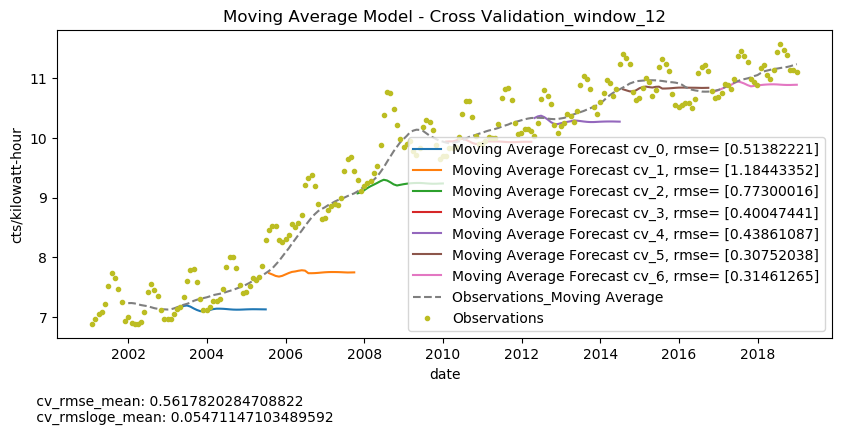

0.5617820284708822 0.05471147103489592


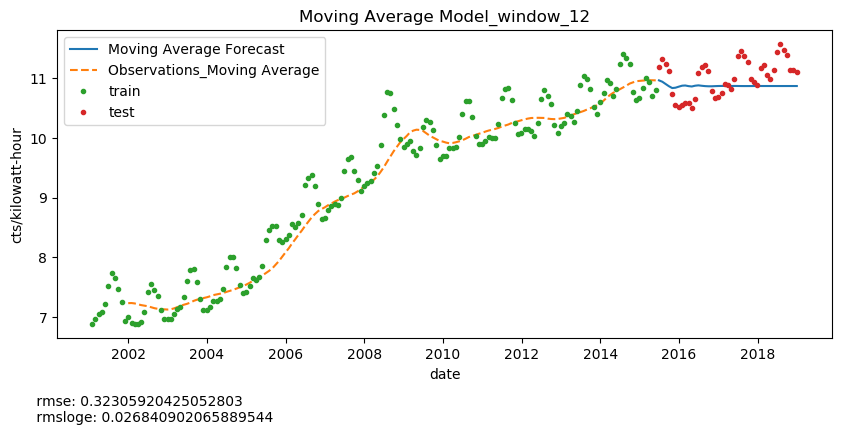

0.32305920425052803 0.026840902065889544
            Model   rmsloge      rmse  cv_rmse_mean
0  Moving Average  0.026841  0.323059      0.561782
1  Moving Average  0.026841  0.323059      0.561782


In [248]:
variable='Average retail price of electricity'
df_data_=df_monthly_US.copy()
window_=12
cv=7 #number of splits for cross validation
test_size_=0.2 #test size for prediction (no cross validation)


#cross validation 
#split data
my_tscv_split, my_splits=data_ts_split(df_data_, n_splits=cv)
#Evaluate the model
cv_rmse_mean, cv_rmsloge_mean=moving_average_evaluation(df_data_, window_, my_tscv_split, my_splits)



#prediction
#split data
my_tscv_split, my_splits=data_ts_split(df_data_, test_size=0.2) 
#Evaluate the model
rmse, rmsloge, y_hat=moving_average_evaluation(df_data_, window_, my_tscv_split, my_splits)

#saving results for later model selection
df_model_assesment=df_model_assesment.append({'Model':'Moving Average',
                                              'rmsloge': rmsloge,
                                              'rmse': rmse,
                                              'cv_rmse_mean':cv_rmse_mean}, 
                                             ignore_index=True)


print(df_model_assesment )


### Facebook Prophet (fbprophet) Model

In [14]:
from fbprophet import Prophet  #import facebook prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric 

C:\Users\Elizabeth\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Elizabeth\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable


In [15]:
#Extracting and labeling the time series as required by fbprophet model
df_data=df_monthly_US.copy()
variables=['date', "Average retail price of electricity"]
df_y=df_data.loc[slice(None),variables]
df_y.columns=['ds','y'] #prophet model requires the columns to be label as ds and y

#Spliting for train (history) and test (future)
test_size=0.2
max_idx_train=round(len(df_y)*(1-test_size))
df_y_train=df_y.iloc[0:max_idx_train,slice(None)]
df_y_test=df_y.iloc[max_idx_train:,slice(None)]

#Instantiate
m = Prophet() 
m.add_seasonality(name='yearly', period=365, fourier_order=5, mode='additive') #Parameters

#fit the model
m.fit(df_y_train)


INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Elizabeth\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [16]:
#predict
y_predict = m.predict(df_y_test) 
print(y_predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

#Model assesment
#Taking the square root of mean_squared_log_error
mslogerror=np.sqrt(mean_squared_log_error(df_y_test['y'], y_predict['yhat'])) 
#Taking the square root of mean_squared_error
mserror=np.sqrt(mean_squared_error(df_y_test['y'], y_predict['yhat'])) 

print('mslogerror', mslogerror)
print('mserror', mserror)

           ds       yhat  yhat_lower  yhat_upper
38 2018-08-31  12.319658   11.842269   12.815011
39 2018-09-30  12.152319   11.654943   12.671108
40 2018-10-31  11.839232   11.352124   12.360024
41 2018-11-30  11.699975   11.190618   12.262988
42 2018-12-31  11.725543   11.215993   12.283906
mslogerror 0.04641876087501963
mserror 0.5737011447405002


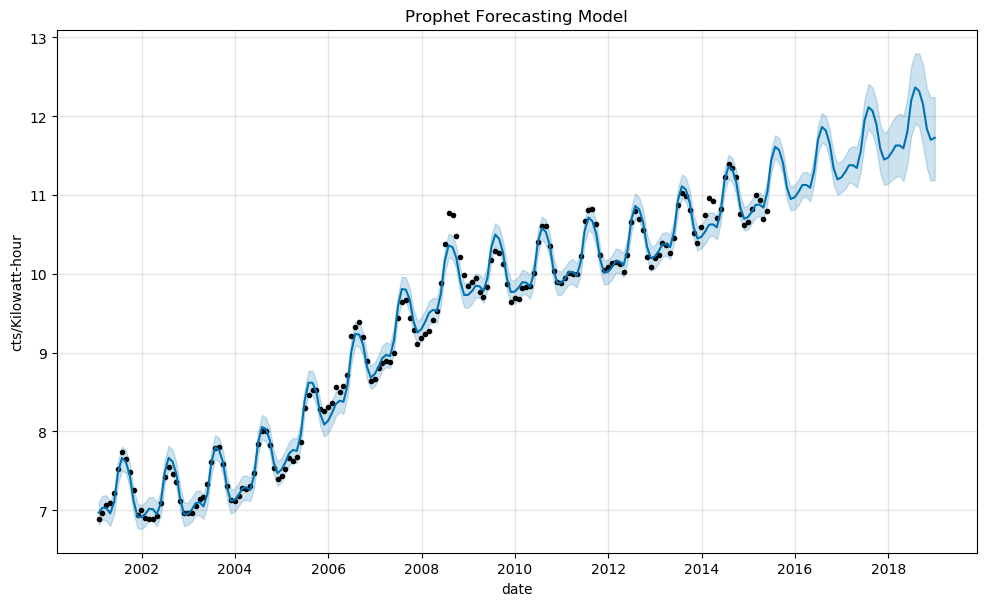

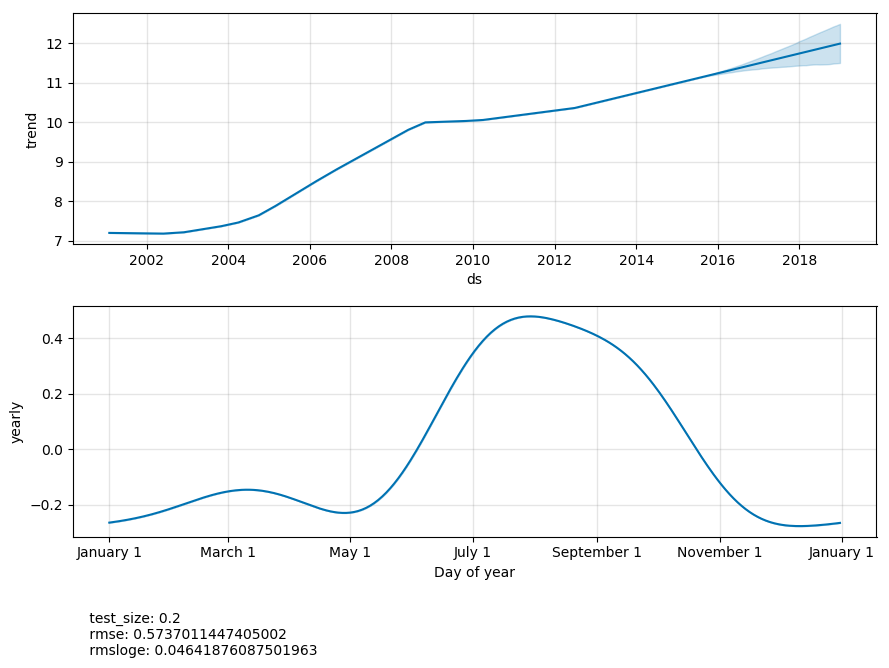

In [17]:
#Visualization of the model

#In this case the prediction is done over the whole data to visualize the model behavior
y_predict_all = m.predict(df_y) 

fig1 = m.plot(y_predict_all)
plt.title('Prophet Forecasting Model')
plt.xlabel('date')
plt.ylabel('cts/Kilowatt-hour')
plt.savefig('img_part4/fbprophet_model_part1.png', bbox_inches = "tight")

fig2 = m.plot_components(y_predict_all)

plt.figtext(0.1, -0.1, 
            ' test_size: '+str(test_size)+
            '\n rmse: ' + str(mserror)+
            '\n rmsloge: ' + str(mslogerror), 
            horizontalalignment='left',
            fontsize=10) 


plt.savefig('img_part4/fbprophet_model_part2.png', bbox_inches = "tight")
plt.show()
plt.rcdefaults() #restore plot default values

INFO:fbprophet:Making 5 forecasts with cutoffs between 2004-06-04 00:00:00 and 2014-05-31 00:00:00
C:\Users\Elizabeth\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



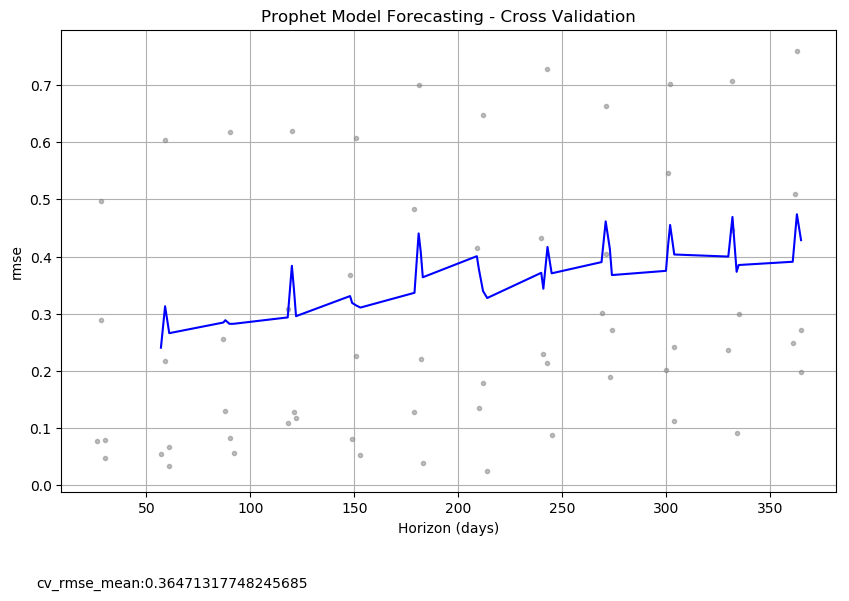

cv_rmse.mean():  0.36471317748245685


In [18]:
#Cross validation

df_cv = cross_validation(m, initial='912 days', period='912 days', horizon = '365 days')
df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='rmse') 
plt.title('Prophet Model Forecasting - Cross Validation')
plt.figtext(0.1, -0.05, 
            'cv_rmse_mean:'+str(df_p['rmse'].mean()), 
            horizontalalignment='left',
            fontsize=10) 

plt.savefig('img_part4/fbprophet_cv.png', bbox_inches = "tight")
plt.show()
plt.rcdefaults() #restore plot default values

print('cv_rmse.mean(): ',df_p['rmse'].mean())

According to te RMSE graph, the error increase when the test size or prediction window (Horizon) is bigger

In [19]:

#saving results for later model selection
df_model_assesment=df_model_assesment.append({'Model':'fbprophet',
                                              'rmsloge': mslogerror,
                                              'rmse': mserror,
                                              'cv_rmse_mean':df_p['rmse'].mean()}, 
                                             ignore_index=True)


print(df_model_assesment )

            Model   rmsloge      rmse  cv_rmse_mean
0  Moving Average  0.026841  0.323059      0.649718
1       fbprophet  0.046419  0.573701      0.364713


#### ARIMA

In [131]:
#import
from statsmodels.tsa.arima_model import ARIMA 


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:100: DeprecationWarning:

`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly

C:\Users\Elizabeth\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [132]:
# evaluation / cross validation of ARIMA model for a given order (p,d,q)
def evaluate_arima_model(df_data, arima_order, typ, dynamic, trend, n_splits=1, test_size=0.2):
    
    #initializations
    rmserror=np.empty(shape=(n_splits,1))
    rmslogerror=np.empty(shape=(n_splits,1))
    idx_cv=0  #Index
    test_size=0.2
    
    print(arima_order, typ, dynamic, trend, n_splits)

    #Format the size of the figure/plot
    width=10
    height=4
    plt.rcParams['figure.figsize'] = [width, height]

    #Data Split
    if n_splits==1:
        max_idx_train=round(len(df_data)*(1-test_size))
        tscv_split=[(np.arange(0,max_idx_train),np.arange(max_idx_train,len(df_data)))]
        forecast_cv=''
    else:
        tscv = TimeSeriesSplit(n_splits)
        tscv_split=tscv.split(df_data.index) #generator
        forecast_cv='cv_'+str(idx_cv)
 
    # evaluating the model per set of data splitted
    for train_index, test_index in tscv_split:
        
        df_train=df_data.iloc[train_index,slice(None)].set_index('date')
        df_test=df_data.iloc[test_index,slice(None)].set_index('date')
        

        #Getting Variables of interest for moving average (trend estimation)
        ts_y_train=df_train[variable]
        ts_y_test=df_test[variable]

        
        
        #instantiate and 'fit the model'
        #ARIMA.initialize()
        model = ARIMA(ts_y_train, order=arima_order)
        try:
            model_fit = model.fit(disp=0, trend=trend)
            ts_y_hat_avg=model_fit.predict( ts_y_test.index[0], ts_y_test.index[-1], typ=typ, dynamic=dynamic)
        except:
            rmserror[idx_cv]=float('NaN')
            rmslogerror[idx_cv]=float('NaN')
            print('convergency problem')
            break
        
        #print(ts_y_hat_avg[0:5])
        
        
        #Model assesment
        try:
            #Taking the square root of mean_squared_log_error
            rmserror[idx_cv]=np.sqrt(mean_squared_log_error( ts_y_test.values, ts_y_hat_avg))

        except:
            rmslogerror[idx_cv]=float('NaN')

        #Taking the square root of mean_squared_error
        rmserror[idx_cv]=np.sqrt(mean_squared_error(ts_y_test, ts_y_hat_avg))     
        
        

        
        #Plotting Forecast
        plt.plot(ts_y_hat_avg, label='ARIMA Forecast '+forecast_cv+ ', rmse= '+str(rmserror[idx_cv]))
        idx_cv+=1
        
    if idx_cv!=0:
        if n_splits==1:
            plot_type='ARIMA Model'
            file='img_part4/arima_model_'
            performance1='\n rmse: '
            performance2='\n rmsloge: '
            plt.plot(ts_y_train, marker='.', linestyle='none', label='train')
            plt.plot(ts_y_test, marker='.', linestyle='none', label='test') #figsize=(15,8), title= variable, fontsize=14

        else:
            plot_type='ARIMA Model - Cross Validation'
            file='img_part4/ARIMA_grid_search/arima_model_cv_'
            performance1='\n cv_rmse_mean: '
            performance2='\n cv_rmsloge_mean: '
            plt.plot(ts_y_train.append(ts_y_test), marker='.', linestyle='none', label='Observations')


        #plot identifications
        plt.ylabel('cts/kilowatt-hour')
        plt.xlabel('date')
        plt.legend(loc='best')
        plt.title(plot_type+', order '+ str(arima_order)+'_typ:'+str(typ)+
                  '_dynamic:'+str(dynamic)+'_trend:'+str(trend))


        plt.figtext(0.1, -0.1, 
                    performance1 + str(rmserror.mean())+ 
                    performance2 + str(rmslogerror.mean()), 
                    horizontalalignment='left',
                    fontsize=10) 
        plt.savefig(file+
                    str(arima_order)+'_'+
                    str(typ)+'_'+
                    str(dynamic)+'_'+
                    str(trend)+'.png', bbox_inches = "tight")

        plt.show()
        plt.rcdefaults() #restore plot default values
        print(rmserror.mean(), rmslogerror.mean())
    return rmserror.mean(), rmslogerror.mean()

In [133]:
#grid searching of ARIMA hyperparameters p, d and q 
def grid_searching_ARIMA(df_data, p_values, d_values, q_values, typ_values, dynamic_values, trend_values, n_splits):
    
    #Scores
    pd_scores=pd.DataFrame(columns=['order','rmse','rmsloge','typ','dynamic','trend'])
    #print(p_values, d_values, q_values, typ_values, dynamic_values, trend_values, n_splits)
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for typ in typ_values:
                    for dynamic in dynamic_values:
                        for trend in trend_values:
                            order = (p,d,q)
                            #print(order)
                            try:
                                #rmse,rmsloge= evaluate_arima_model(df_data, order, typ, dynamic, trend, test_size)
                                rmse,rmsloge=evaluate_arima_model(df_data,order, typ, dynamic, trend, n_splits)
                                #print(order, typ, dynamic, trend, n_splits)
                                scor_param={'order':order,
                                            'rmse':rmse, 
                                            'rmsloge':rmsloge, 
                                            'typ':typ, 
                                            'dynamic':dynamic,
                                            'trend':trend,}
                                
                                pd_scores=pd_scores.append(scor_param, ignore_index=True)
                                print(pd.scores.tail())
                            except:
                                continue
    #print('Best ARIMA%s RMSE=', pd_scores[pd_scores.rmse==pd_scores.rmse.min()])
    return pd_scores 
    

In [ ]:
# evaluate parameters to find best model fit
p_values_ = [0,1,2,4,6,8,10,12]
d_values_ = range(0, 3)
q_values_ = range(0,3)
typ_values_=['linear', 'levels']
dynamic_values_=[True, False]
trend_values_=['c','nc']

#cross validations splits
n_splits_=7

#Data
variable='Average retail price of electricity'
df_data=df_monthly_US.copy()

#Grid search
pd_scores=grid_searching_ARIMA(df_data, p_values_, d_values_, q_values_, typ_values_, dynamic_values_, trend_values_, n_splits_)
best_cfg= pd_scores[pd_scores.rmse==pd_scores.rmse.min()]
#Best hyperparameters
print('Best ARIMA%s RMSE=', best_cfg)

pd_scores.to_csv('img_part4/ARIMA_grid_search/ARIMA_scores.csv',index=False)

(0, 0, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tu

convergency problem
(0, 0, 0) linear True nc 5
convergency problem
(0, 0, 0) linear False c 5
convergency problem
(0, 0, 0) linear False nc 5
convergency problem
(0, 0, 0) levels True c 5
convergency problem
(0, 0, 0) levels True nc 5
convergency problem
(0, 0, 0) levels False c 5
convergency problem
(0, 0, 0) levels False nc 5
convergency problem
(0, 0, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

convergency problem
(0, 0, 1) linear True nc 5
convergency problem
(0, 0, 1) linear False c 5
convergency problem
(0, 0, 1) linear False nc 5
convergency problem
(0, 0, 1) levels True c 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(0, 0, 1) levels True nc 5
convergency problem
(0, 0, 1) levels False c 5
convergency problem
(0, 0, 1) levels False nc 5
convergency problem
(0, 0, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(0, 0, 2) linear True nc 5
convergency problem
(0, 0, 2) linear False c 5
convergency problem
(0, 0, 2) linear False nc 5
convergency problem
(0, 0, 2) levels True c 5
convergency problem
(0, 0, 2) levels True nc 5
convergency problem
(0, 0, 2) levels False c 5
convergency problem
(0, 0, 2) levels False nc 5
convergency problem
(0, 1, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 0) linear True nc 5
convergency problem
(0, 1, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

(0, 1, 0) linear False nc 5
convergency problem
(0, 1, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

(0, 1, 0) levels True nc 5
convergency problem
(0, 1, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

(0, 1, 0) levels False nc 5
convergency problem
(0, 1, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 1) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 1, 2) linear True c 5
convergency problem
(0, 1, 2) linear True nc 5
convergency problem
(0, 1, 2) linear False c 5
convergency problem
(0, 1, 2) linear False nc 5
convergency problem
(0, 1, 2) levels True c 5
convergency problem
(0, 1, 2) levels True nc 5
convergency problem
(0, 1, 2) levels False c 5
convergency problem
(0, 1, 2) levels False nc 5
convergency problem
(0, 2, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 0) linear True nc 5
convergency problem
(0, 2, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

(0, 2, 0) linear False nc 5
convergency problem
(0, 2, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

(0, 2, 0) levels True nc 5
convergency problem
(0, 2, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arra

(0, 2, 0) levels False nc 5
convergency problem
(0, 2, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 1) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(0, 2, 2) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 0, 0) linear True c 5
convergency problem

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tu


(1, 0, 0) linear True nc 5
convergency problem
(1, 0, 0) linear False c 5
convergency problem
(1, 0, 0) linear False nc 5
convergency problem
(1, 0, 0) levels True c 5
convergency problem
(1, 0, 0) levels True nc 5
convergency problem
(1, 0, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided,

convergency problem
(1, 0, 0) levels False nc 5
convergency problem
(1, 0, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 0, 1) linear True nc 5
convergency problem
(1, 0, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 0, 1) linear False nc 5
convergency problem
(1, 0, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 0, 1) levels True nc 5
convergency problem
(1, 0, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 0, 1) levels False nc 5
convergency problem
(1, 0, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 0, 2) linear True nc 5
convergency problem
(1, 0, 2) linear False c 5
convergency problem
(1, 0, 2) linear False nc 5
convergency problem
(1, 0, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 0, 2) levels True nc 5
convergency problem
(1, 0, 2) levels False c 5
convergency problem
(1, 0, 2) levels False nc 5
convergency problem
(1, 1, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 0) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 0) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 0) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 0) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 1, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 1) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 1, 2) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 0) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(1, 2, 1) linear True c 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) linear True nc 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) linear False c 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) linear False nc 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) levels True c 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) levels True nc 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) levels False c 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(1, 2, 1) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(1, 2, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(1, 2, 2) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 0, 0) linear True c 5
convergency problem
(2, 0, 0) linear True nc 5
convergency problem
(2, 0, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tu

convergency problem
(2, 0, 0) linear False nc 5
convergency problem
(2, 0, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 0) levels True nc 5
convergency problem
(2, 0, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 0) levels False nc 5
convergency problem
(2, 0, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 1) linear True nc 5
convergency problem
(2, 0, 1) linear False c 5
convergency problem
(2, 0, 1) linear False nc 5
convergency problem

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




(2, 0, 1) levels True c 5
convergency problem
(2, 0, 1) levels True nc 5
convergency problem
(2, 0, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 1) levels False nc 5
convergency problem
(2, 0, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 2) linear True nc 5
convergency problem
(2, 0, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 2) linear False nc 5
convergency problem
(2, 0, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 0, 2) levels True nc 5
convergency problem
(2, 0, 2) levels False c 5
convergency problem
(2, 0, 2)

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

 levels False nc 5
convergency problem
(2, 1, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 0) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 1, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 1) linear True nc 5
convergency problem

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




(2, 1, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 1) linear False nc 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(2, 1, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 1) levels True nc 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(2, 1, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 1) levels False nc 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(2, 1, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 2) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency informat

(2, 1, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 2) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency informat

(2, 1, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 2) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency informat

(2, 1, 2) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No f

(2, 1, 2) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency informat

(2, 2, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 0) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(2, 2, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 1) linear True nc 5
convergency problem

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




(2, 2, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 1) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 1) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 1) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(2, 2, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian 

convergency problem
(2, 2, 2) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning:

invalid value encountered

convergency problem
(2, 2, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian 

convergency problem
(2, 2, 2) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning:

invalid value encountered

convergency problem
(2, 2, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian 

convergency problem
(2, 2, 2) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning:

invalid value encountered

convergency problem
(2, 2, 2) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian 

convergency problem
(2, 2, 2) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning:

invalid value encountered

convergency problem
(4, 0, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tu

convergency problem
(4, 0, 0) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 0) linear False c 5
convergency problem


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



(4, 0, 0) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 0) levels True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 0) levels False c 5
convergency problem
(4, 0, 0) levels False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 1) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning:

invalid value encountered in true_divide



convergency problem
(4, 0, 1) linear True nc 5
convergency problem
(4, 0, 1) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 1) linear False nc 5
convergency problem
(4, 0, 1) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 1) levels True nc 5
convergency problem
(4, 0, 1) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 1) levels False nc 5
convergency problem
(4, 0, 2) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 2) linear True nc 5
convergency problem
(4, 0, 2) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 2) linear False nc 5
convergency problem
(4, 0, 2) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 2) levels True nc 5
convergency problem
(4, 0, 2) levels False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



convergency problem
(4, 0, 2) levels False nc 5
convergency problem
(4, 1, 0) linear True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a 

(4, 1, 0) linear True nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(4, 1, 0) linear False c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(4, 1, 0) linear False nc 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(4, 1, 0) levels True c 5


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

(12, 1, 0) levels False c 1


C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

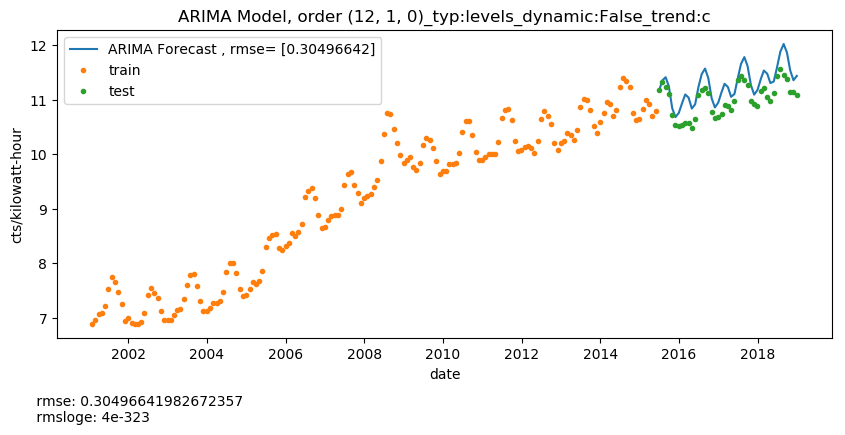

0.30496641982672357 4e-323


In [134]:
#Predict with ARIMA's best fit hyperparameters

#best hyperparameters
"""
order_=best_cfg['order'].values[0]
typ_=best_cfg['typ'].values[0]
dynamic_=best_cfg['dynamic'].values[0]
trend_=best_cfg['trend'].values[0]
"""

#Data
variable='Average retail price of electricity'
df_data=df_monthly_US.copy()

#best hyperparameters
order_=(12,1,0)
typ_='levels'
dynamic_='False'
trend_='c'
#"""


test_size_=0.2
arima_mserror,arima_mslogerror=evaluate_arima_model(df_data,order_, typ_, dynamic_, trend_, test_size=test_size_)


In [ ]:

#saving results for later model selection
df_model_assesment=df_model_assesment.append({'Model':'ARIMA',
                                              'rmsloge': arima_mslogerror,
                                              'rmse': arima_mserror,
                                              'cv_rmse_mean':best_cfg['rmse'].values[0]}, 
                                             ignore_index=True)


print(df_model_assesment )

# ----------------------------------------------------------------------------------------------------

### Moving Average + other Regressors

In [249]:
#Generate an atemporal data set by differentiating the time series with its moving average
#The atemporability is giving by predicting the "seasonality" changes by using the features that affect such changes.
def diff_data(df_data, variable, window, tscv_split):
    df_train=pd.DataFrame()
    df_test=pd.DataFrame()
    ts_y_train=pd.Series()
    ts_y_test=pd.Series()

    #Splitting data in history and test
    train_index, test_index=tscv_split[0]
    df_train=df_data.iloc[train_index,slice(None)].set_index('date')
    df_test=df_data.iloc[test_index,slice(None)].set_index('date')
    #df_data=df_data.set_index('date')
    
   
    #Getting Variables of interest for moving average (trend estimation)
    ts_y_train=df_train[variable]
    ts_y_test=df_test[variable]

    #Eliminating the trend component of our predicted variable by substracting the trend from the time series.
    ts_moving_avg=ts_y_train.rolling(window).mean()
    mov_avg_rmse, mov_avg_rmsloge,  ts_mov_avg_y_hat=moving_average_evaluation(df_data, window, tscv_split, 1, plot=False)
    #print(type(ts_mov_avg_y_hat), type(ts_y_test))
    ts_diff_y_train=ts_y_train-ts_moving_avg
    ts_diff_y_test=ts_y_test-ts_mov_avg_y_hat
    
    df_data=df_data.set_index('date')
    df_data.loc[ts_diff_y_train.index,'diff_y']=ts_diff_y_train
    df_data.loc[ts_diff_y_test.index, 'diff_y']=ts_diff_y_test

    """#plt.plot(df_data['diff_y'])
    plt.plot(ts_diff_y_train, color='red', label='Diff History')
    #plt.plot(ts_diff_y_test, color='blue', label='Diff Test')
    plt.title('US Average retail price of electricity -  without trend')
    plt.ylabel('cts per Killowatt-hour')
    plt.legend()
    plt.show()
    plt.rcdefaults() #restore plot default values"""

    df_data=df_data.dropna()

    # Create arrays for the features and the response variable
    variable2="diff_y"
    ts_diff_y = df_data[variable2]
    df_X = df_data.drop([variable, variable2], axis=1)
    df_X_test=df_test.drop([variable], axis=1)
      
    return df_X, ts_diff_y, df_X_test, ts_y_test, ts_diff_y_test
    #return df_diff_X_train, ts_diff_y_train, df_X_test, ts_y_test, ts_diff_y_test

In [250]:
# list of ml-linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor


def get_models(models=dict()):
# linear models
    models['Linear Regression'] = LinearRegression()
    models['Lasso'] = Lasso(max_iter=10000)
    models['Ridge'] = Ridge()
    models['ElasticNet'] = ElasticNet()
    #models['huber'] = HuberRegressor()
    #models['lars'] = Lars()
    #models['llars'] = LassoLars()
    #models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    #models['ranscac'] = RANSACRegressor()
    #models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
    print('Defined %d models' % len(models))
    return models

def get_param_grid(param_grid=dict()):
# linear models
    param_grid['Linear Regression'] = {'model__fit_intercept':[True,False]}
    param_grid['Lasso'] = {'model__alpha':np.logspace(-4, 4, 50)}
    param_grid['Ridge'] = {'model__alpha':np.logspace(-4, 0, 50), 'model__fit_intercept':[True,False]}
    param_grid['ElasticNet'] = {'model__l1_ratio': np.linspace(0, 1, 30)}
 
    print('Defined %d models_parameter_grid' % len(param_grid))
    return param_grid

In [251]:
#Fit the linear regresor with atemporal features/output and predict on features corresponding to the time series split
#to be able to combine with the moving average prediction
def linear_ml_regressors(X, y, df_ts_X_test, model_inst, parameters, regressor_id,gridsearch=False):
    from sklearn.model_selection import GridSearchCV
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import Imputer 
    from sklearn.preprocessing import StandardScaler
    from sklearn.externals import joblib
    import warnings
    from sklearn.exceptions import DataConversionWarning
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)
        
    #Create training and test sets for the atemporal (diff) data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)    
        
    # Instantiate model
    regressor = model_inst
        
    # Setup the pipeline steps: steps
    steps = [#('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
             ('scaler', StandardScaler()),
             ('model', regressor)]

    # Create the pipeline: pipeline
    pipe = Pipeline(steps)

    if gridsearch==True:
        #Instantiate the GridSearchCV object cv
        cv_pipe = GridSearchCV(pipe, param_grid=parameters, cv=3)
        
        # Fit the regressor to the training data
        cv_pipe.fit(X_train, y_train)
       
        #Best fit model
        best_parameters=cv_pipe.best_params_
        best_estimator_coef=cv_pipe.best_estimator_.steps[-1][1].coef_ 
        print("Tuned Model Parameters: {}".format(best_parameters))   
        print("Tuned Model Coeficients: {}".format(best_estimator_coef))   
        #===========
        #Format the size of the figure/plot
        
        width=10
        height=4
        plt.rcParams['figure.figsize'] = [width, height]
        
        # Plot coefficients of best fit model
        plot_type='Moving Average + '+ regressor_id+ ' Model'
        x_ticks=range(0, len(X.columns))
        print(x_ticks,X.columns.values)
        plt.plot(x_ticks, best_estimator_coef)
        plt.xticks(x_ticks, X.columns.values, rotation=90)
        plt.title(plot_type+'\n coeficients - '+variable)
        plt.margins(0.02)
    
        file='img_part4/mov_avg_plus_'+regressor_id+'coef'
        plt.savefig(file+'.png', bbox_inches = "tight")

        plt.show()
        plt.rcdefaults() #restore plot default values
        #===========
        #save model for later use
        file='img_part4/mov_avg_plus_'+regressor_id+'.sav'
        joblib.dump(cv_pipe.best_estimator_, file)
 
    else:
        cv_pipe=pipe
        # Fit the regressor to the training data
        cv_pipe.fit(X_train, y_train)
        best_parameters=parameters
        best_estimator_coef=cv_pipe.steps[-1][1].coef_ 



    # Predict on the test data: y_pred
    y_pred = cv_pipe.predict(X_test)
    
    #predict on the time series test data
    y_pred1 = cv_pipe.predict(df_ts_X_test) 

   
    
    # Metrics to evaluate best fit model
    print("R^2: {}".format(cv_pipe.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error: {}".format(rmse))


    """
     #Plot Differentiated Observations Vs Forecast
    plt.scatter(y_test, y_pred)
    plt.xlabel('Differentiated Observations')
    plt.ylabel('Forecast Differentiated Values')
    plt.title(regressor_id)
    plt.show()
    
    #Plot Forecast Differentiated Variable 
    plt.plot(df_ts_X_test.index[0:], y_pred1)
    plt.title('Forecast Differentiated - '+ variable)
    plt.ylabel('cts per Killowatt-hour')
    plt.show()"""
   
  
    
    
    return y_pred1, best_parameters, best_estimator_coef

In [252]:
#Cross validation of combined model
def combined_model_cross_validation(df_data_, variable, regressor, best_param, regressor_id):
    #initializations
    from sklearn.externals import joblib
    n_splits=7
    mov_avg_rmserror=np.empty(shape=(n_splits,1))
    mov_avg_rmslogerror=np.empty(shape=(n_splits,1))
    diff_rmserror=np.empty(shape=(n_splits,1))
    diff_rmslogerror=np.empty(shape=(n_splits,1))
    rmserror=np.empty(shape=(n_splits,1))
    rmslogerror=np.empty(shape=(n_splits,1))
    idx_cv=0  #Index
    df_train=pd.DataFrame()
    df_test=pd.DataFrame()
    
    file='img_part4/mov_avg_plus_'+regressor_id+'.sav'
    loaded_model = joblib.load(file)
    
    #Format the size of the figure/plot
    width=10
    height=4
    plt.rcParams['figure.figsize'] = [width, height]
        
    #split data 
    
    my_tscv_split_cv, my_splits_cv=data_ts_split(df_data_, n_splits=n_splits)
    
    for train_index_cv, test_index_cv in my_tscv_split_cv:
        df_train=df_data_.iloc[train_index_cv,slice(None)].set_index('date')
        df_test=df_data_.iloc[test_index_cv,slice(None)].set_index('date')
        
        #Getting Variables of interest 
        ts_y_train=df_train[variable]
        ts_y_test=df_test[variable]       
        
        #================================================================================================
        #Forecast trend
   
        my_tscv_split=[(train_index_cv, test_index_cv)]
        
        
        #Forecast trend with Moving Average  model
        mov_avg_rmserror[idx_cv], mov_avg_rmslogerror[idx_cv], ts_mov_avg_y_hat=moving_average_evaluation(df_data_, 
                                                                                                        window_, 
                                                                                                        my_tscv_split, 
                                                                                                        1, plot=False)
        #===================================================================================================
        #Forecast diferentiated y
        
        #Get differentiated y 
       
        df_X, ts_diff_y, df_X_test, ts_y_test, ts_diff_y_test=diff_data(df_data_, variable, window_, my_tscv_split)
    
        #Run the model with already fitted model
        """"diff_y_hat, best_param, coefs = linear_ml_regressors(df_X, 
                                                             ts_diff_y, 
                                                             df_X_test, 
                                                             regressor, 
                                                             best_param, 
                                                             regressor_id)"""
        #Re-train model
        loaded_model.fit(df_X.drop(df_X_test.index,axis=0), ts_diff_y.drop(ts_diff_y_test.index, axis=0))
        #predict
        diff_y_hat=loaded_model.predict(df_X_test)
        #Model assesment
        #Taking the square root of mean_squared_log_error
        try:
            diff_rmslogerror[idx_cv]=np.sqrt(mean_squared_log_error(ts_diff_y_test.values, diff_y_hat))
        except:
            diff_rmslogerror[idx_cv]=np.nan
        #Taking the square root of mean_squared_error
        diff_rmserror[idx_cv]=np.sqrt(mean_squared_error(ts_diff_y_test.values,diff_y_hat))
        
        #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        #Forecast total values
        ts_y_hat=ts_mov_avg_y_hat+diff_y_hat

        #Model assesment
        #Taking the square root of mean_squared_log_error
        rmslogerror[idx_cv]=np.sqrt(mean_squared_log_error( ts_y_test.values, ts_y_hat.values)) 
        #Taking the square root of mean_squared_error
        rmserror[idx_cv]=np.sqrt(mean_squared_error(ts_y_test.values, ts_y_hat.values))   

        #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        #Plotting Model
        forecast_cv= "'cv_'+str(idx_cv)+ ', rmse= '+str(rmserror[idx_cv])"#+'mov_avg_rmse='+str(mov_avg_rmserror[idx_cv])+' diff_rmse='+str(diff_rmserror[idx_cv])"    
        plot_type='Moving Average + '+ regressor_id+ ' Model'
        file='img_part4/mov_avg_plus_'+regressor_id+'_cv'
        performance1='\n cv_rmse_mean: '
        performance2='\n cv_rmsloge_mean: '

        plt.plot(ts_y_hat, label=eval(forecast_cv))
        print(idx_cv, my_splits_cv)
        idx_cv+=1
    
 
    plt.plot(df_data_.set_index(['date'])[variable], marker='.', linestyle='none', label='Observations')

    #plot identifications
    plt.ylabel('cts/kilowatt-hour')
    plt.xlabel('date')
    plt.legend(loc='best')
    plt.title(plot_type)


    plt.figtext(0.1, -0.1, 
                performance1 + str(rmserror.mean())+ 
                performance2 + str(rmslogerror.mean()), 
                horizontalalignment='left',
                fontsize=10) 


    plt.savefig(file+'.png', bbox_inches = "tight")

    plt.show()
    plt.rcdefaults() #restore plot default values
    print(rmserror, rmslogerror)
        
    

In [253]:


def run_MOV_AVG_PLUS_Other(variable, df_data):


    test_size_=0.2 #test size for prediction (no cross validation)
    #split data
    my_tscv_split, my_splits=data_ts_split(df_data_, test_size=0.2) 

    #Moving Average hyperparameters
    window_=12

    #Forecast trend with Moving Average  model
    mov_avg_mserror, mov_avg_mslogerror, ts_mov_avg_y_hat=moving_average_evaluation(df_data_, 
                                                                                    window_, 
                                                                                    my_tscv_split, 
                                                                                    my_splits)

    #Get differentiated y
    df_X,ts_diff_y, df_X_test, ts_y_test, ts_diff_y_test=diff_data(df_data_, variable, window_, my_tscv_split)

    #Get regression models
    models=get_models()
    param_grids=get_param_grid()

    for regressor_id in models:  
        #print(regressor_id)
        regressor=models[regressor_id]
        param_grid=param_grids[regressor_id] 
        #print(regressor,param_grid)
        #regressor.get_params().keys()

        print(regressor_id, regressor)
        #Find best fit model for Forecast differentiated Y+++++++++++++++++++++++++++++++++++++++++++++++++++++
        diff_y_hat, best_param, coefs = linear_ml_regressors(df_X, ts_diff_y, 
                                                             df_X_test, 
                                                             regressor, 
                                                             param_grid,
                                                             regressor_id,
                                                             gridsearch=True)


        #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        #Forecast total values
        ts_y_hat=ts_mov_avg_y_hat+diff_y_hat

        #Model assesment
        #Taking the square root of mean_squared_log_error
        rmslogerror=np.sqrt(mean_squared_log_error( ts_y_test.values, ts_y_hat.values)) 
        #Taking the square root of mean_squared_error
        rmserror=np.sqrt(mean_squared_error(ts_y_test.values, ts_y_hat.values))   

        #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        #Plotting Model
        width=10
        height=4
        plt.rcParams['figure.figsize'] = [width, height]
        
        plot_type='Moving Average + '+ regressor_id+ ' Model'
        file='img_part4/mov_avg_plus_'+regressor_id
        performance1='\n rmse: '
        performance2='\n rmsloge: '
        performance3='\n best_fit_parameters: '

        plt.plot(ts_y_hat, label='Forecast Moving Average + Forecast Differentiated')
        plt.plot(df_data_.set_index(['date'])[variable], marker='.', linestyle='none', label='Observations')

        #plot identifications
        plt.ylabel('cts/kilowatt-hour')
        plt.xlabel('date')
        plt.legend(loc='best')
        plt.title(plot_type)


        plt.figtext(0.1, -0.1, 
                    performance1 + str(rmserror.mean())+ 
                    performance2 + str(rmslogerror.mean())+
                    performance3 + str(best_param), 
                    horizontalalignment='left',
                    fontsize=10) 


        plt.savefig(file+'.png', bbox_inches = "tight")

        plt.show()
        plt.rcdefaults() #restore plot default values
        print(rmserror, rmslogerror)
       

        #=====================================================================================================
        #Cross validation of combined model
        combined_model_cross_validation(df_data_, variable, regressor, best_param, regressor_id)
        

"""
        #===================================================================================================
        #saving results for later model selection
        df_model_assesment=df_model_assesment.append({'Model':'Moving Average + '+regressor_id,
                                                      'rmsloge': rmslogerror,
                                                      'rmse': rmserror,}, 
                                                      ignore_index=True)


    print(df_model_assesment )"""

"\n        #===================================================================================================\n        #saving results for later model selection\n        df_model_assesment=df_model_assesment.append({'Model':'Moving Average + '+regressor_id,\n                                                      'rmsloge': rmslogerror,\n                                                      'rmse': rmserror,}, \n                                                      ignore_index=True)\n\n\n    print(df_model_assesment )"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
date                                        216 non-null datetime64[ns]
Net generation                              216 non-null float64
Retail sales of electricity                 216 non-null float64
Revenue from retail sales of electricity    216 non-null float64
Average retail price of electricity         216 non-null float64
Number of customer accounts                 216 non-null float64
TAVG                                        216 non-null float64
TMAX                                        216 non-null float64
TMIN                                        216 non-null float64
month                                       216 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 17.0 KB
None


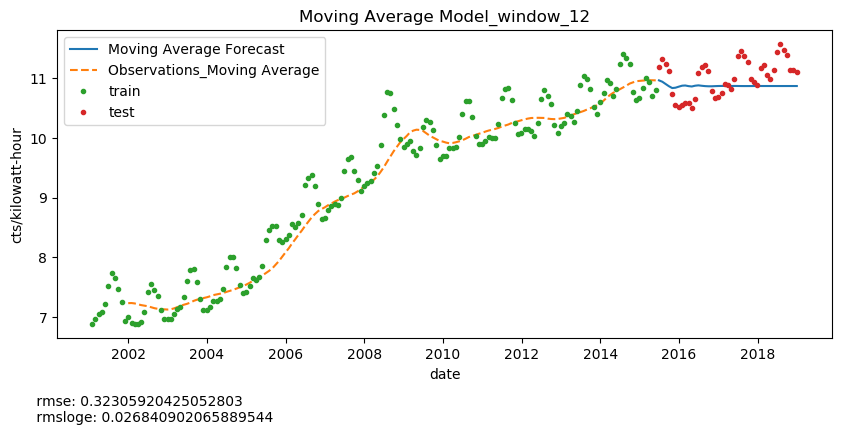

0.32305920425052803 0.026840902065889544
Defined 4 models
Defined 4 models_parameter_grid
Linear Regression LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Tuned Model Parameters: {'model__fit_intercept': True}

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.




Tuned Model Coeficients: [ 8.00642445e-02  1.03649259e-01 -2.92762462e-02  3.43289113e-03
 -5.13829546e+01  2.70159135e+01  2.45556016e+01  1.92542484e-02]
range(0, 8) ['Net generation' 'Retail sales of electricity'
 'Revenue from retail sales of electricity' 'Number of customer accounts'
 'TAVG' 'TMAX' 'TMIN' 'month']


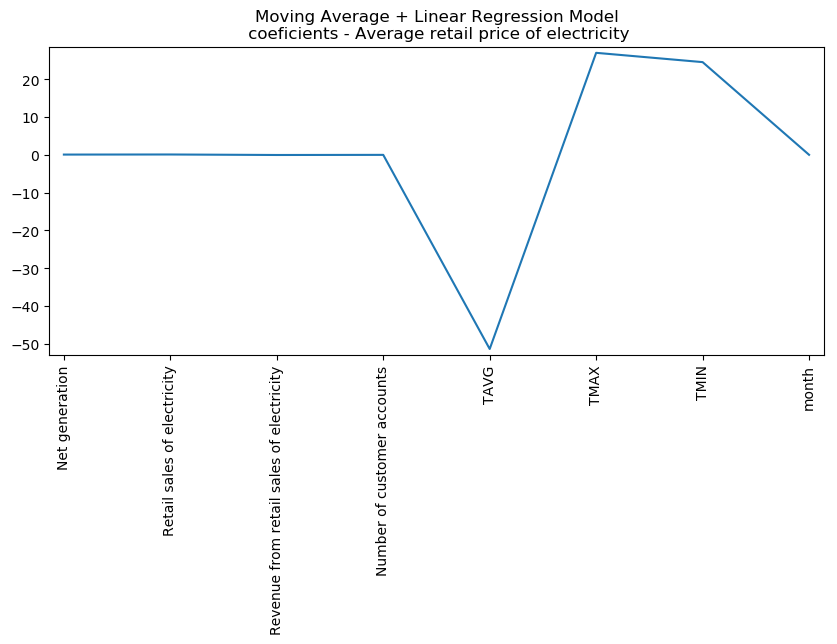

R^2: 0.6198321681983068
Root Mean Squared Error: 0.193921265595259


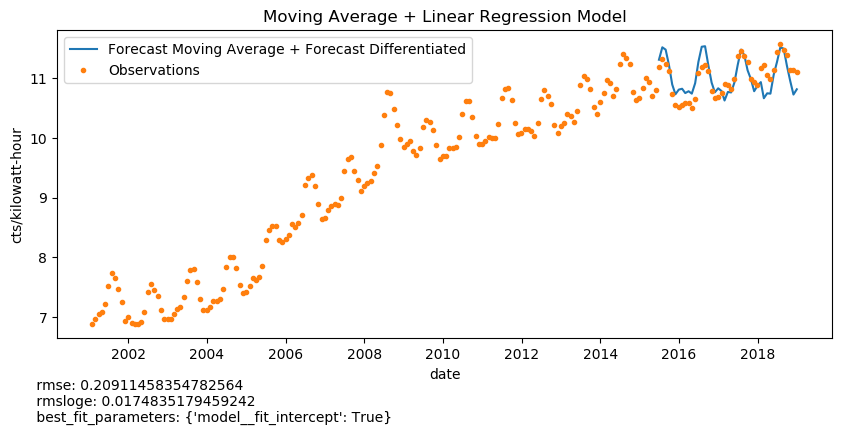

0.20911458354782564 0.0174835179459242
0 7
1 7
2 7
3 7
4 7
5 7
6 7


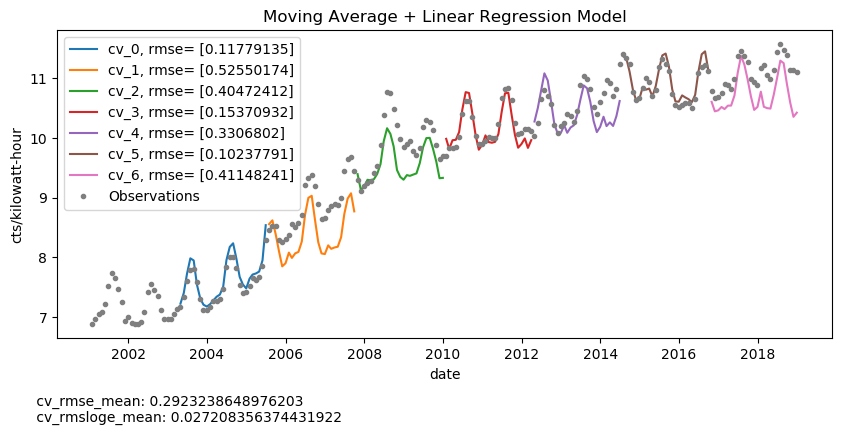

[[0.11779135]
 [0.52550174]
 [0.40472412]
 [0.15370932]
 [0.3306802 ]
 [0.10237791]
 [0.41148241]] [[0.01327051]
 [0.0543946 ]
 [0.03716292]
 [0.01380575]
 [0.02856273]
 [0.00851429]
 [0.03474768]]
Lasso Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Tuned Model Parameters: {'model__alpha': 0.0020235896477251557}
Tuned Model Coeficients: [ 0.07814582  0.07901576 -0.         -0.01941371  0.          0.13644717
  0.          0.01024386]
range(0, 8) ['Net generation' 'Retail sales of electricity'
 'Revenue from retail sales of electricity' 'Number of customer accounts'
 'TAVG' 'TMAX' 'TMIN' 'month']


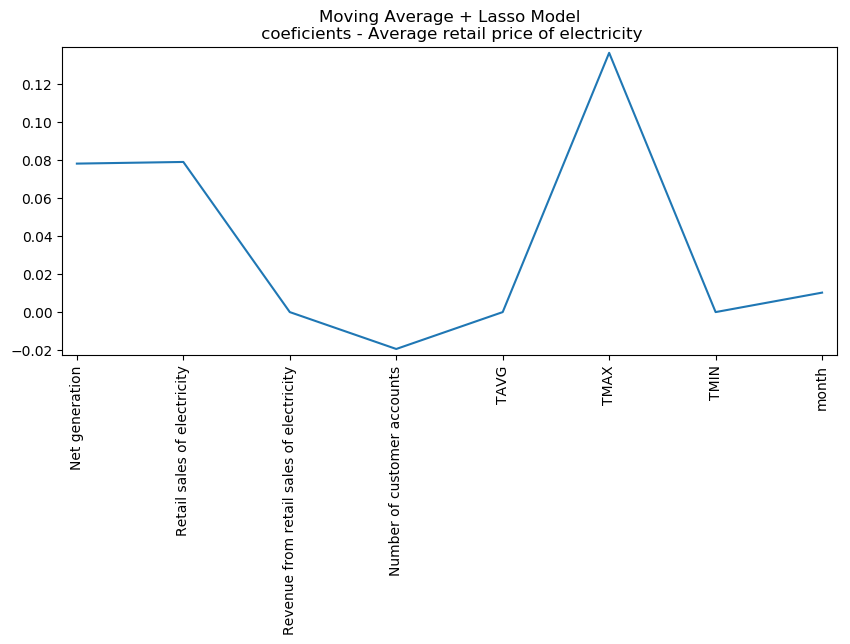

R^2: 0.6229526818198199
Root Mean Squared Error: 0.19312374829388756


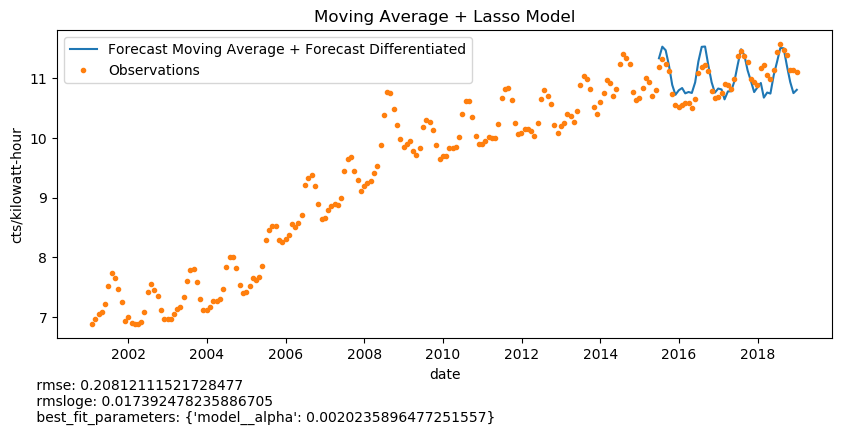

0.20812111521728477 0.017392478235886705
0 7
1 7
2 7
3 7
4 7
5 7
6 7


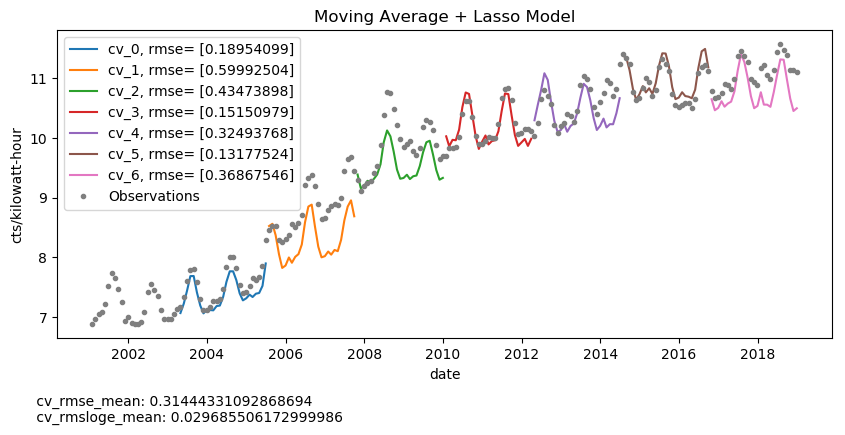

[[0.18954099]
 [0.59992504]
 [0.43473898]
 [0.15150979]
 [0.32493768]
 [0.13177524]
 [0.36867546]] [[0.02190337]
 [0.06220043]
 [0.03994386]
 [0.01360129]
 [0.02806746]
 [0.01101328]
 [0.03106886]]
Ridge Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Tuned Model Parameters: {'model__alpha': 1.0, 'model__fit_intercept': True}
Tuned Model Coeficients: [ 0.07363725  0.08965831 -0.00971096 -0.01702835  0.04714264  0.08762883
  0.00415563  0.0110113 ]
range(0, 8) ['Net generation' 'Retail sales of electricity'
 'Revenue from retail sales of electricity' 'Number of customer accounts'
 'TAVG' 'TMAX' 'TMIN' 'month']


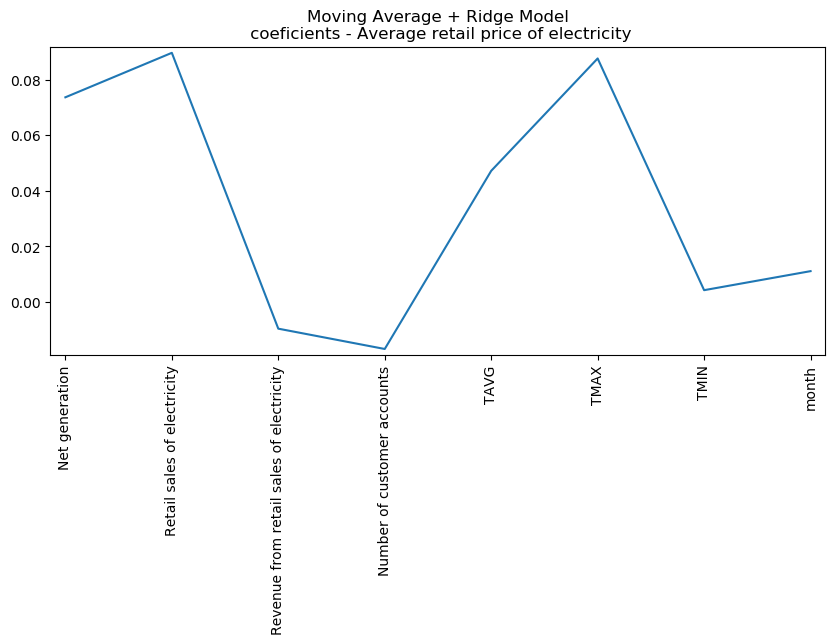

R^2: 0.6174710403198419
Root Mean Squared Error: 0.19452253184357232


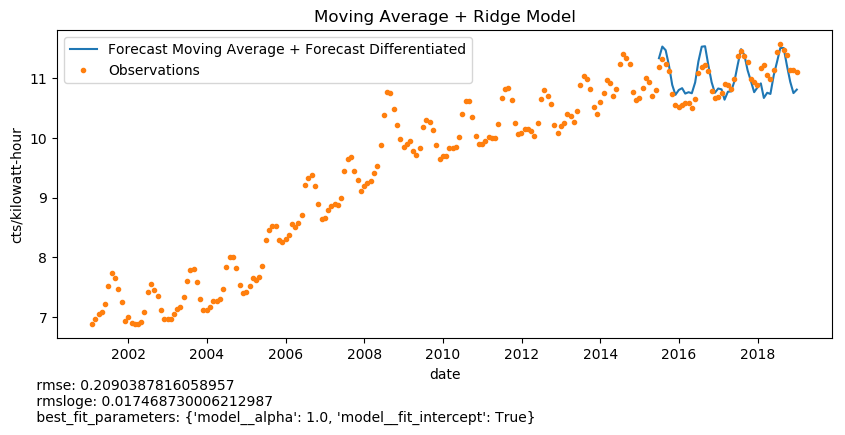

0.2090387816058957 0.017468730006212987
0 7
1 7
2 7
3 7
4 7
5 7
6 7


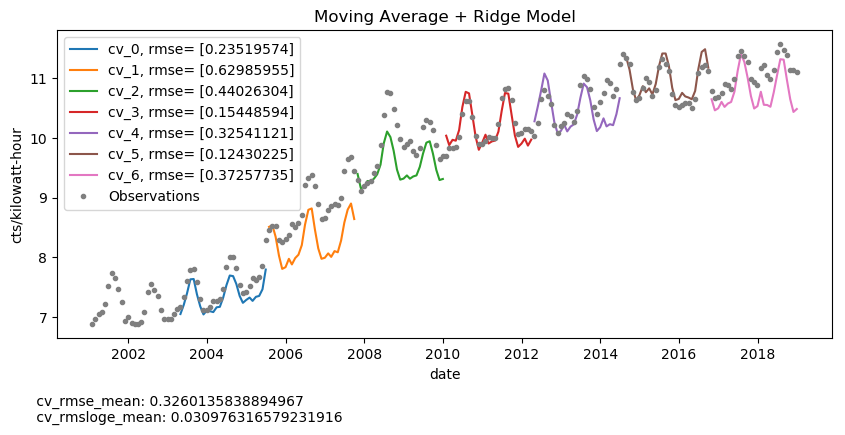

[[0.23519574]
 [0.62985955]
 [0.44026304]
 [0.15448594]
 [0.32541121]
 [0.12430225]
 [0.37257735]] [[0.02724192]
 [0.06535599]
 [0.04045946]
 [0.01387663]
 [0.02811612]
 [0.0103752 ]
 [0.0314089 ]]
ElasticNet ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed i

Tuned Model Parameters: {'model__l1_ratio': 0.0}
Tuned Model Coeficients: [ 0.0488992   0.04663085  0.02427578 -0.01068788  0.03976347  0.03939095
  0.04009163  0.00894759]
range(0, 8) ['Net generation' 'Retail sales of electricity'
 'Revenue from retail sales of electricity' 'Number of customer accounts'
 'TAVG' 'TMAX' 'TMIN' 'month']


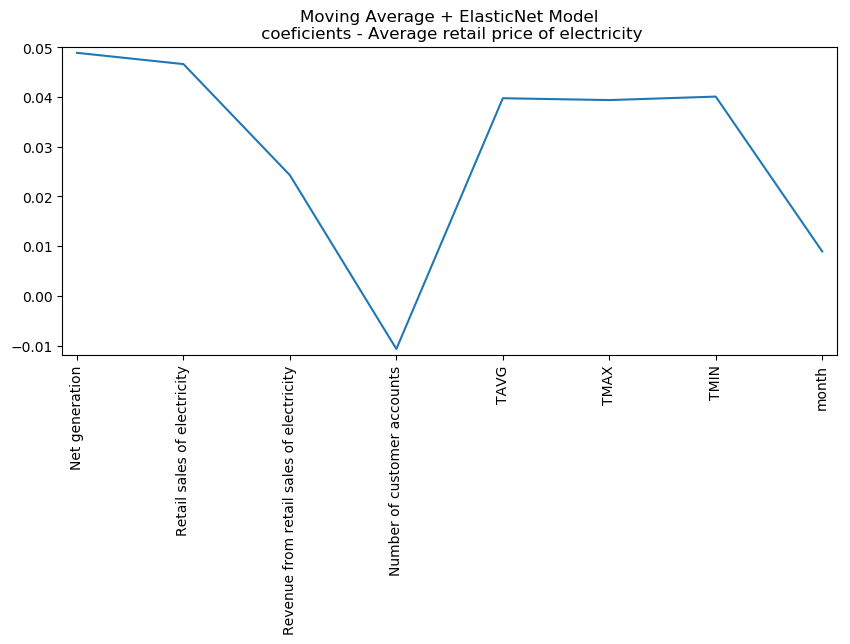

R^2: 0.6109583625308156
Root Mean Squared Error: 0.19617144727178784


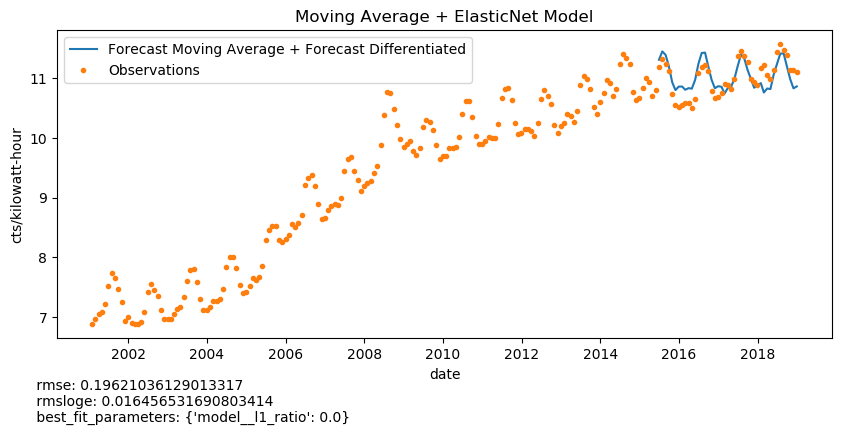

0.19621036129013317 0.016456531690803414


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



0 7
1 7


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



2 7
3 7


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



4 7


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



5 7


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



6 7


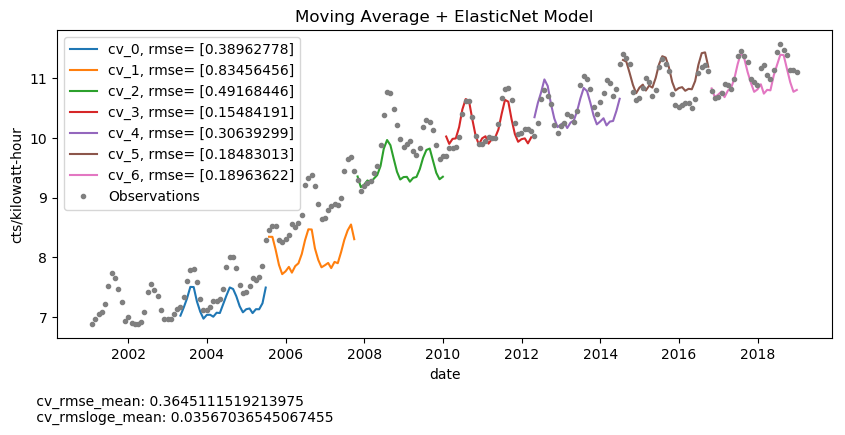

[[0.38962778]
 [0.83456456]
 [0.49168446]
 [0.15484191]
 [0.30639299]
 [0.18483013]
 [0.18963622]] [[0.04568966]
 [0.08721742]
 [0.04514238]
 [0.01381458]
 [0.0264184 ]
 [0.01562855]
 [0.01578157]]


In [254]:
variable_='Average retail price of electricity'
df_data_=df_monthly_US.copy()
print(df_data_.info())
run_MOV_AVG_PLUS_Other(variable_, df_data_)

